# Topic 20: Extensions to Linear Models

- onl01-dtsc-ft-022221
- 04/13/21

## Objectives

**DISCUSSION:**
- Discuss interactions between variables
- Discuss using dictionaries for scrubbing the whole df in a few lines of code. 
- Discuss polynomial regressions.
- Discuss the Bias vs Variance trade-off.



**APPLICATION:**
- Linear Regression with Boston Housing data set

## Topics Covered in Section 20


- Interactions
- Polynomial Regression    
- Bias-Variance Trade Off

# Interactions

## What is an interaction?

When variables interact to **cause an effect** to another variable but is **not the sum of their parts**

> "An interaction is a particular property of two or more variables where they interact in a non-additive manner when affecting a third variable" - *Section recap*

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-interaction-terms-online-ds-pt-100719/master/images/new_diet_image.png">


> In our example, the interaction plot was composed out of categorical predictors (countries and diet type), but interactions can occur between categorical variables or between a mix of categorical variables and continuous variables!

### Confounding factor

>This means that the "Country" and "Diet" affect weight loss in a non-additive matter. If we're mostly interested in the effect of diet on weight loss (which seems to be plausible here), we say that "Country" is a **confounding factor** of the effect of "Diet" on weight loss.

![](images/diet_interaction.png)

### Why is important to account for interactions?

> - "Not accounting for them might lead to results that are wrong."

> - You'll also notice that including them when they're needed will increase your $R^2$ value!


- Replacing 2 individual columns with their interaction column can reduce the overall number of features.

- One way of addessing multicollinearity is to replace 2 multicollinear columns with the interaction term.

### When should we use interactions?

- Whenever it can help the model, but not required.
- Can use in hypothesis testing as well (for ANOVAs)

## Using seaborn to view interactions

https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

- ~~`sns.factorplot`~~
- `sns.catplot`
- `sns.FacetGrid`

In [1]:
# !pip install -U fsds
from fsds.imports import *
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smf

pd.set_option('display.max_columns',0)
plt.style.use('seaborn-notebook')

fsds v0.3.2 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
df = fs.datasets.load_boston()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Ex Interaction: Not very different

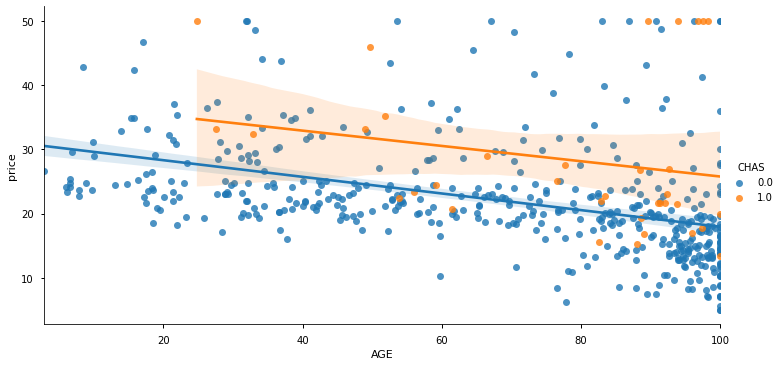

In [3]:
g = sns.lmplot(data=df, x='AGE', y='price', hue='CHAS', aspect=2)

### Example Interaction: different

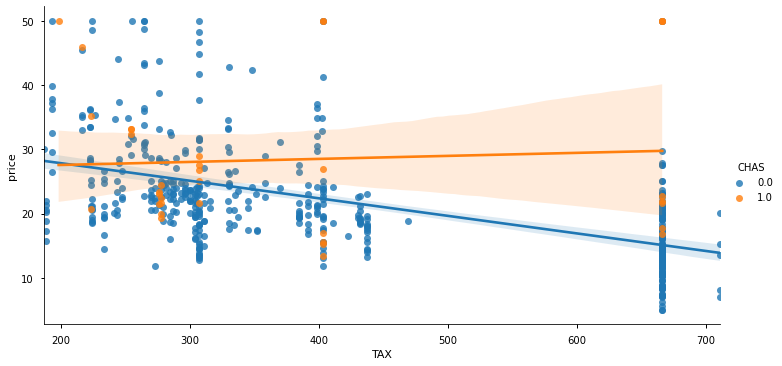

In [4]:
g = sns.lmplot(data=df, x='TAX', y='price', hue='CHAS', aspect=2)

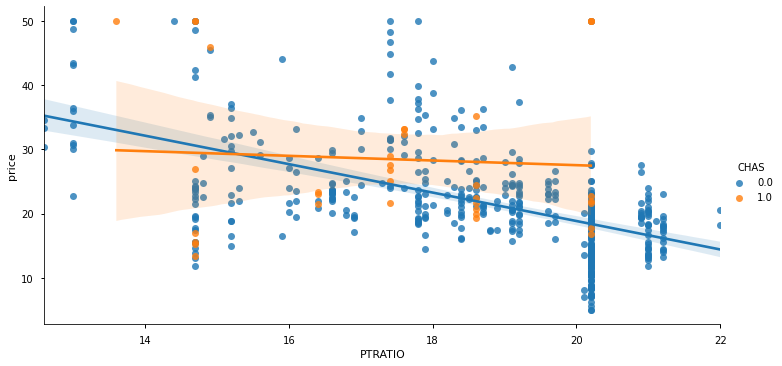

In [5]:
g = sns.lmplot(data=df, x='PTRATIO', y='price', hue='CHAS', aspect=2)

In [6]:
## Drop unneeded cols
drop_cols = ['INDUS']
[df.drop(col,axis=1,inplace=True) for col in drop_cols if col in df.columns]
df.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
## Recasting datatypes
df.dtypes

CRIM       float64
ZN         float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
price      float64
dtype: object

In [8]:
recast_dict = {'CHAS':int}
for col, dtype in recast_dict.items():
    df[col] = df[col].astype(dtype)

In [9]:
df.dtypes

CRIM       float64
ZN         float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
price      float64
dtype: object

In [10]:
df.describe().round(3)

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,12.653,22.533
std,8.602,23.322,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,7.141,9.197
min,0.006,0.000,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,1.730,5.000
25%,0.082,0.000,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,6.950,17.025
50%,0.257,0.000,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,11.360,21.200
75%,3.677,12.500,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,16.955,25.000
max,88.976,100.000,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,37.970,50.000


In [11]:
df.select_dtypes('int').columns

Index(['CHAS'], dtype='object')

In [12]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [13]:
## Get lists of categorical vs numeric columns
target = 'price'

## Scale non-categorical columns
cat_cols = list(df.select_dtypes('int').columns)
num_cols = list(df.drop(columns=[target]).select_dtypes(include = ['number'],
                                                   exclude= ['int']).columns)
cat_cols, num_cols



(['CHAS'],
 ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'])

In [14]:
## Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
df.describe().round(3)

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-0.000,0.000,0.069,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,22.533
std,1.001,1.001,0.254,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,9.197
min,-0.420,-0.488,0.000,-1.466,-3.880,-2.335,-1.267,-0.983,-1.314,-2.707,-1.531,5.000
25%,-0.411,-0.488,0.000,-0.913,-0.569,-0.837,-0.806,-0.638,-0.768,-0.488,-0.799,17.025
50%,-0.391,-0.488,0.000,-0.144,-0.108,0.317,-0.279,-0.523,-0.465,0.275,-0.181,21.200
75%,0.007,0.049,0.000,0.599,0.483,0.907,0.662,1.661,1.531,0.807,0.603,25.000
max,9.934,3.804,1.000,2.732,3.555,1.117,3.961,1.661,1.798,1.639,3.549,50.000


In [16]:
# deal with outliers in numeric non-target columns
idx_out = fs.find_outliers_Z(df['CRIM'])
df.loc[idx_out]

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
380,9.933931,-0.487722,0,1.004680,0.973563,0.829454,-1.130686,1.661245,1.530926,0.806576,0.638763,10.4
398,4.042606,-0.487722,0,1.194724,-1.184795,1.117494,-1.095936,1.661245,1.530926,0.806576,2.514288,5.0
404,4.412370,-0.487722,0,1.194724,-1.073672,0.598310,-1.039938,1.661245,1.530926,0.806576,2.064330,8.5
405,7.483646,-0.487722,0,1.194724,-0.857124,1.117494,-1.126455,1.661245,1.530926,0.806576,1.447566,5.0
410,5.530321,-0.487722,0,0.365444,-0.751699,1.117494,-1.132350,1.661245,1.530926,0.806576,-0.356471,15.0
414,4.903104,-0.487722,0,1.194724,-2.515426,1.117494,-1.015789,1.661245,1.530926,0.806576,3.409999,7.0
418,8.136884,-0.487722,0,1.073787,-0.466767,1.117494,-0.947146,1.661245,1.530926,0.806576,1.116756,8.8
427,3.962320,-0.487722,0,1.073787,-0.117726,0.360054,-0.918481,1.661245,1.530926,0.806576,0.261696,10.9


In [17]:
df_outs = pd.DataFrame()
## Find outliers
for col in num_cols:
    idx_outs = fs.find_outliers_Z(df[col])
    df_outs[col]= idx_outs
## Remove outliers
out_rows = df_outs.any(axis=1)
out_rows

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [18]:
df = df.loc[~out_rows]
df

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,-0.419782,0.284830,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,24.0
1,-0.417339,-0.487722,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,21.6
2,-0.417342,-0.487722,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,34.7
3,-0.416750,-0.487722,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,33.4
4,-0.412482,-0.487722,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,-0.418147,22.4
502,-0.415249,-0.487722,0,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,-0.500850,20.6
503,-0.413447,-0.487722,0,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,-0.983048,23.9
504,-0.407764,-0.487722,0,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,-0.865302,22.0


In [19]:
df.describe().round(3)

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
count,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000
mean,-0.101,-0.107,0.070,0.012,-0.007,0.020,-0.038,-0.022,-0.021,0.012,-0.003,22.287
std,0.582,0.812,0.256,0.991,0.876,0.978,0.912,0.985,0.990,0.982,0.937,8.622
min,-0.420,-0.488,0.000,-1.466,-2.731,-2.335,-1.267,-0.983,-1.308,-2.707,-1.531,5.600
25%,-0.410,-0.488,0.000,-0.835,-0.561,-0.760,-0.795,-0.638,-0.768,-0.488,-0.741,17.100
50%,-0.391,-0.488,0.000,-0.144,-0.109,0.310,-0.275,-0.523,-0.465,0.298,-0.142,21.100
75%,-0.052,-0.488,0.000,0.599,0.439,0.901,0.557,-0.178,1.531,0.807,0.595,24.800
max,2.914,2.946,1.000,2.732,2.978,1.117,2.580,1.661,1.798,1.269,2.995,50.000


In [20]:
target='price'
col_list = list(df.drop(target,axis=1).columns)
col_list

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [21]:
## MAKE FULL FORMULA
formula = target+'~'+ ' + '.join(col_list) #target~predictors
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     115.2
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          3.40e-124
Time:                        13:46:11   Log-Likelihood:                -1363.9
No. Observations:                 469   AIC:                             2752.
Df Residuals:                     457   BIC:                             2802.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.8876      0.224     97.758      0.000      21.448      22.328
CRIM          -1.4183      0.661     -2.145      0.032      -2.718      -0.119
ZN             0.1895      0.359      0.528      0.598      -0.516       0.895
CHAS           3.4029      0.837      4.067      0.000       1.759       5.047
NOX           -1.8117      0.421     -4.299      0.000      -2.640      -0.984
RM             3.0758      0.325      9.474      0.000       2.438       3.714
AGE           -0.0989      0.363     -0.273      0.785      -0.811       0.614
DIS           -2.7331      0.428     -6.393      0.000      -3.573      -1.893
RAD            2.1251      0.599      3.545      0.000       0.947       3.303
TAX           -1.6301      0.557     -2.926      0.004      -2.725      -0.535
PTRATIO       -1.9158      0.278     -6.897      0.000      -2.462      -1.370
LSTAT         -4.0839      0.386    -10.579      0.000      -4.843      -3.325
==============================================================================
Omnibus:                      205.669   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1292.504
Skew:                           1.795   Prob(JB):                    2.17e-281
Kurtosis:                      10.298   Cond. No.                         8.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

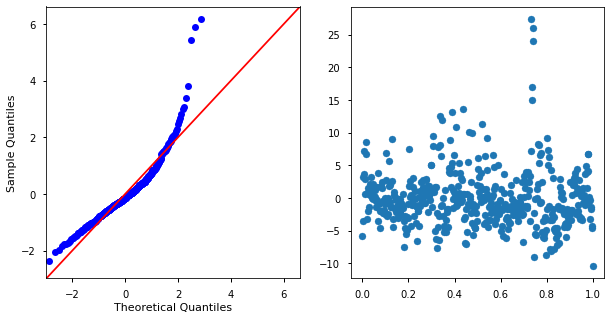

In [22]:
## Diagnose Model
resids = model.resid

fig,ax = plt.subplots(ncols=2,figsize=(10,5))
sms.qqplot(resids, stats.distributions.norm,
          fit=True, line='45',ax=ax[0])
xs = np.linspace(0,1,len(resids))
ax[1].scatter(x=xs,y=resids)

In [23]:
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smf


def make_ols_f(df,target='price',col_list=[], diagnose=True):
    """
    Makes statsmodels formula-based regression with options to make categorical columns.    
    Args:
        df (Frame): df with data
        target (str): target column name
        diagnose (bool, optional): Plot Q-Q plot & residuals. Defaults to True.
    
    Returns:
        model : statsmodels ols model
    
    """
    ## Get list of columns to use
    if len(col_list)==0:
        col_list = list(df.drop(target,axis=1).columns)


    ## MAKE FULL FORMULA
    formula = target+'~'+'+'.join(col_list) #target~predictors
    
    ## Fit model and display summary
    model = smf.ols(formula=formula, data=df).fit()
    display(model.summary())
        
    ## Plot Q-Qplot & model residuals
    if diagnose:
        fig,ax = diagnose_model(model)
        plt.show()

    return model

def diagnose_model(model):
    """
    Plot Q-Q plot and model residuals from statsmodels ols model.
    
    Args:
        model (smf.ols model): statsmodels formula ols 
    
    Returns:
        fig, ax: matplotlib objects
    """
    
    resids = model.resid
    
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    sms.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    xs = np.linspace(0,1,len(resids))
    ax[1].scatter(x=xs,y=resids)
    
    return fig,ax  

## Making a baseline model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     115.2
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          3.40e-124
Time:                        13:46:11   Log-Likelihood:                -1363.9
No. Observations:                 469   AIC:                             2752.
Df Residuals:                     457   BIC:                             2802.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.8876      0.224     97.758      0.000      21.448      22.328
CRIM          -1.4183      0.661     -2.145      0.032      -2.718      -0.119
ZN             0.1895      0.359      0.528      0.598      -0.516       0.895
CHAS           3.4029      0.837      4.067      0.000       1.759       5.047
NOX           -1.8117      0.421     -4.299      0.000      -2.640      -0.984
RM             3.0758      0.325      9.474      0.000       2.438       3.714
AGE           -0.0989      0.363     -0.273      0.785      -0.811       0.614
DIS           -2.7331      0.428     -6.393      0.000      -3.573      -1.893
RAD            2.1251      0.599      3.545      0.000       0.947       3.303
TAX           -1.6301      0.557     -2.926      0.004      -2.725      -0.535
PTRATIO       -1.9158      0.278     -6.897      0.000      -2.462      -1.370
LSTAT         -4.0839      0.386    -10.579      0.000      -4.843      -3.325
==============================================================================
Omnibus:                      205.669   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1292.504
Skew:                           1.795   Prob(JB):                    2.17e-281
Kurtosis:                      10.298   Cond. No.                         8.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

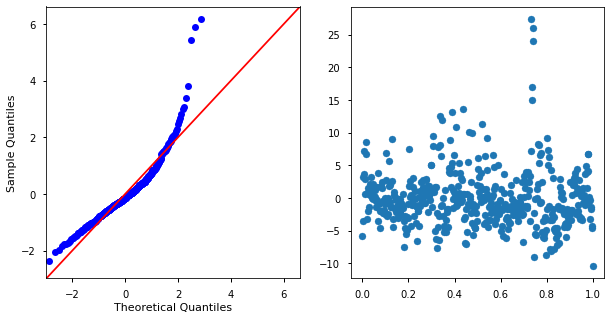

In [24]:
model1 = make_ols_f(df,target='price')

## Interactions Effect On Model

### Adding interaction terms

In [25]:
df['CHAS_TAX'] = df['CHAS'] * df['TAX']
df.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price,CHAS_TAX
0,-0.419782,0.284830,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,24.0,-0.0
1,-0.417339,-0.487722,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,21.6,-0.0
2,-0.417342,-0.487722,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,34.7,-0.0
3,-0.416750,-0.487722,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,33.4,-0.0
4,-0.412482,-0.487722,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,36.2,-0.0


In [26]:
## To create multiple interaction columns
ixn_cols = [['CHAS',"TAX"],
            ['CHAS','PTRATIO']]

for cols in ixn_cols:
    df[cols[0]+'_'+ cols[1]] = df[cols[0]] * df[cols[1]]
df.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price,CHAS_TAX,CHAS_PTRATIO
0,-0.419782,0.284830,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,24.0,-0.0,-0.0
1,-0.417339,-0.487722,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,21.6,-0.0,-0.0
2,-0.417342,-0.487722,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,34.7,-0.0,-0.0
3,-0.416750,-0.487722,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,33.4,-0.0,0.0
4,-0.412482,-0.487722,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,36.2,-0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          2.23e-127
Time:                        13:46:12   Log-Likelihood:                -1351.4
No. Observations:                 469   AIC:                             2731.
Df Residuals:                     455   BIC:                             2789.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.8981      0.219    100.207      0.000      21.469      22.328
CRIM            -1.2025      0.648     -1.855      0.064      -2.477       0.072
ZN               0.1155      0.351      0.329      0.743      -0.575       0.806
CHAS             4.5854      0.894      5.131      0.000       2.829       6.342
NOX             -2.0252      0.427     -4.747      0.000      -2.864      -1.187
RM               3.2189      0.318     10.120      0.000       2.594       3.844
AGE             -0.1705      0.354     -0.482      0.630      -0.866       0.525
DIS             -2.8283      0.420     -6.735      0.000      -3.654      -2.003
RAD              1.9140      0.593      3.225      0.001       0.748       3.080
TAX             -1.7655      0.549     -3.217      0.001      -2.844      -0.687
PTRATIO         -2.0727      0.275     -7.545      0.000      -2.613      -1.533
LSTAT           -3.7261      0.388     -9.601      0.000      -4.489      -2.963
CHAS_TAX         3.4411      1.021      3.371      0.001       1.435       5.447
CHAS_PTRATIO     1.5624      1.037      1.507      0.133      -0.476       3.600
==============================================================================
Omnibus:                      193.808   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1268.803
Skew:                           1.654   Prob(JB):                    3.04e-276
Kurtosis:                      10.348   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

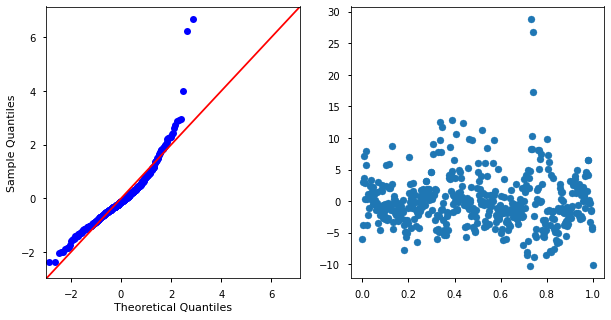

In [27]:
## Fit model
make_ols_f(df)

# Polynomial Regressions

Remember we started with (multiple) linear equation:

$$ \large \hat{y} = w_0 + w_1  x_1 + w_2  x_2 + ... + w_N  x_N $$
$$ \large \hat{y} = \sum_{n=0}^{N} w_n x_n $$


**Knowledge check:** Why is this "linear"?

## Making it more complex!

In [28]:
df2 = fs.datasets.load_yields(version='other')
display(df2.head())

,Temp,Yield
i,,
1,50,3.3
2,50,2.8
3,50,2.9
4,50,3.2
5,60,2.7


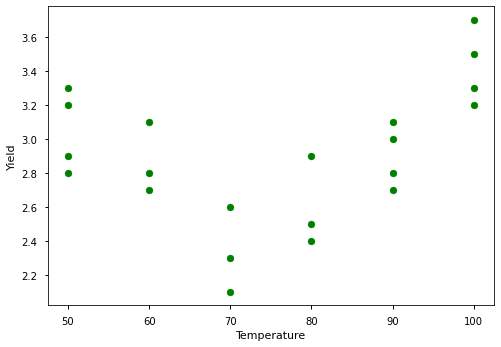

In [29]:
y = df2['Yield']
X = df2.drop(columns=['Yield'])


plt.scatter(X, y, color='green')
plt.xlabel('Temperature')
plt.ylabel('Yield');

$\large \hat y = \hat \beta_0 + \hat \beta_1x $ 

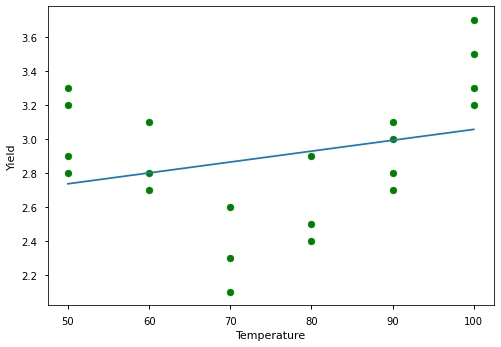

In [30]:
## Fit a simple linear model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

plt.scatter(X, y, color='green')
plt.plot(X, reg.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y, reg.predict(X))
mse = mean_squared_error(y,reg.predict(X))
print(f"R2 = {r2}")
print(f"MSE = {mse}")

R2 = 0.08605718085106362
MSE = 0.13926747720364746


### A quadratic relationship
$\large \hat y = \hat \beta_0 + \hat \beta_1x + \hat \beta_2 x^2$ 

In [32]:
X['Temp_sq'] = X['Temp']**2
X

,Temp,Temp_sq
i,,
1,50,2500
2,50,2500
3,50,2500
4,50,2500
5,60,3600
6,60,3600
7,60,3600
8,70,4900
9,70,4900


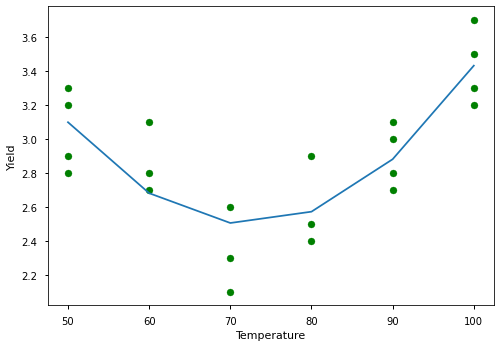

In [33]:
x_plot = X["Temp"]
reg_q = LinearRegression().fit(X,y)


plt.scatter(x_plot, y, color='green')
plt.plot(x_plot, reg_q.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [34]:
r2 = r2_score(y, reg_q.predict(X))
mse = mean_squared_error(y,reg_q.predict(X))
print(f"R2 = {r2}")
print(f"MSE = {mse}")

R2 = 0.694816588411055
MSE = 0.046504138908791626


Adding higher-order polynomials
$$ \large \hat{y} = \beta_0 + \beta_1  x + \beta_2  x^2 + ... + \beta_N  x^N $$
$$ \large \hat{y} = \sum_{n=0}^{N} \beta_n x^n $$

In [35]:
y = df2['Yield']
X = df2.drop(columns=['Yield'])
X.shape

(21, 1)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
n_poly = 6
polyfeat = PolynomialFeatures(n_poly)
X_poly = polyfeat.fit_transform(X)
display(X_poly[:10])
X_poly.shape

array([[1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05, 6.25000e+06,
        3.12500e+08, 1.56250e+10],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05, 6.25000e+06,
        3.12500e+08, 1.56250e+10],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05, 6.25000e+06,
        3.12500e+08, 1.56250e+10],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05, 6.25000e+06,
        3.12500e+08, 1.56250e+10],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05, 1.29600e+07,
        7.77600e+08, 4.66560e+10],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05, 1.29600e+07,
        7.77600e+08, 4.66560e+10],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05, 1.29600e+07,
        7.77600e+08, 4.66560e+10],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05, 2.40100e+07,
        1.68070e+09, 1.17649e+11],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05, 2.40100e+07,
        1.68070e+09, 1.17649e+11],
       [1.00000e+00, 7.00000

(21, 7)

In [37]:
col_names = [f"{'Temp'}^{i}" for i in range(n_poly+1)]
df_poly = pd.DataFrame(X_poly,columns=col_names)
df_poly

,Temp^0,Temp^1,Temp^2,Temp^3,Temp^4,Temp^5,Temp^6
0,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
1,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
2,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
3,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
4,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10
5,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10
6,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10
7,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11
8,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11
9,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11


In [38]:
reg_poly = LinearRegression().fit(X_poly,y)

r2 = r2_score(y, reg_poly.predict(X_poly))
mse = mean_squared_error(y,reg_poly.predict(X_poly))
print(f"R2 = {r2}")
print(f"MSE = {mse}")

R2 = 0.7591145833278744
MSE = 0.03670634920718104


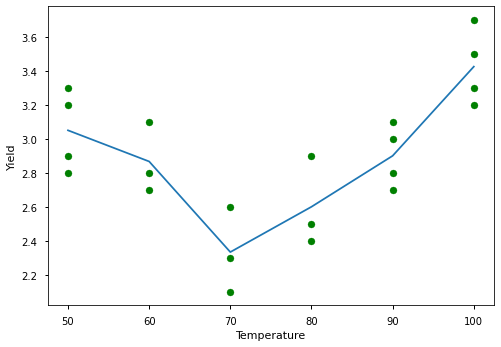

In [39]:
plt.scatter(x_plot, y, color='green')
plt.plot(x_plot, reg_poly.predict(X_poly))
plt.xlabel('Temperature')
plt.ylabel('Yield');

# Bias-Variance Trade Off

## Underfitting and Overfitting


![which_model](ds-model_validation/img/which_model_is_better_2.png)

> *Underfitting* happens when a model cannot learn the training data, nor can it generalize to new data.

> *Overfitting* happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data 


## The Bias-Variance Trade Off


Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. 

We can break down our error term (the mean squared error) as the sum of 3 sources of error: 

- *bias*
- *variance*, and
- *irreducible error* 

$\Large Total\ Error\ = Prediction\ Error+ Irreducible\ Error$
 

$$ \large \text{MSE} = \text{Bias}(\hat{f}(x))^2 + \text{Var}(\hat{f}(x)) + \sigma^2$$
- The derivation of this can be found [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-bias-variance-trade-off-online-ds-pt-100719/master/images/new_bias_variance.png" width=50%>

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/bias_variance_optimize.png">


> **The balance between bias and variance is a trade-off.** We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. 
- Bias is usually associated with low model complexity, variance with high model complexity.
- There is generally a "sweet spot" in-between, compromising between bias and variance.




### Bias

$$\large \text{Bias}(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$$
- **Bias** arises when wrong assumptions are made when training a model. For example:

    - An interaction effect is missed, 
    - We missed a certain polynomial relationship. 
    
    - Because of this, our algorithm misses the relevant relations between predictors and the target variable.
    - *(Note how this is similar to underfitting!)*
    

### Variance

 $$Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$$
- **Variance** arises  when a model is too sensitive to small fluctuations in the training set. 

    - When variance is high, random noise is modeled instead of the intended outputs. 
    - *(This is overfitting!)*

### Calcualted in Lab:
- [Bias Variance Trade-Off Lab](https://nbviewer.jupyter.org/github/learn-co-curriculum/dsc-bias-variance-trade-off-lab/blob/solution/index.ipynb)

### How do we know if our model is overfitting or underfitting?

If our model is not performing well on the training  data, we are probably underfitting it.  

To know if our  model is overfitting the data, we need  to test our model on unseen data. 
We then measure our performance on the unseen data. 

If the model performs significantly worse on the  unseen data, it is probably  overfitting the data.

<img src='https://developers.google.com/machine-learning/crash-course/images/WorkflowWithTestSet.svg' width=500/>

#### Bias/Variance Examples from CL "`model_validation-022221FT.ipynb`"

Consider the following scenarios and describe them according to bias and variance. There are four possibilities:

- a. The model has low bias and high variance.
- b. The model has high bias and low variance.
- c. The model has both low bias and low variance.
- d. The model has both high bias and high variance.

**Scenario 1**: The model has a low RMSE on training and a low RMSE on test.
<details>
    <summary> Answer
    </summary>
    c. The model has both low bias and low variance.
    </details>

**Scenario 2**: The model has a high $R^2$ on the training set, but a low $R^2$ on the test.
<details>
    <summary> Answer
    </summary>
    a. The model has low bias and high variance.
    </details>

**Scenario 3**: The model performs well on data it is fit on and well on data it has not seen.
<details>
    <summary> Answer
    </summary>
    c. The model has both low bias and low variance.
    </details>
  

**Scenario 4**: The model has a low $R^2$ on training but high on the test set.
<details>
    <summary> Answer
    </summary>
    d. The model has both high bias and high variance.
    </details>

**Scenario 5**: The model leaves out many of the meaningful predictors, but is consistent across samples.
<details>
    <summary> Answer
    </summary>
    b. The model has high bias and low variance.
    </details>

**Scenario 6**: The model is highly sensitive to random noise in the training set.
<details>
    <summary> Answer
    </summary>
    a. The model has low bias and high variance.
    </details>